In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Assignment3.csv")

In [3]:
df

,x1,x2,x3,x4,x5,y
0,7.11,-447.71,135.66,92.41,96.04,9131.40
1,7.06,-455.33,94.49,91.76,92.16,9001.86
2,6.89,-466.86,186.25,89.54,100.00,8595.85
3,7.25,-440.53,176.83,94.24,84.64,9469.94
4,7.24,-445.92,185.90,94.11,88.36,9448.98
...,...,...,...,...,...,...
96,7.86,479.03,187.04,102.18,88.36,11168.68
97,8.37,489.50,159.51,108.85,81.00,12605.81
98,8.32,496.95,17.12,108.16,92.16,12467.96
99,8.37,546.88,104.18,108.83,100.00,12631.05


In [4]:
def sse(y1,y2):
  return np.sum((y1-y2)**2)

# Task 1

In [5]:
X = df.drop("y",axis=1)
y = df["y"]

In [6]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X,y)
y_pred = linear_model.predict(X)
print(f"Baseline SSE loss = {sse(y,y_pred)}")

Baseline SSE loss = 71877.84134016866


# Task 2

In [7]:
df.describe()

,x1,x2,x3,x4,x5,y
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,7.548713,23.755050,111.371386,98.133762,34.000000,10244.460297
std,0.380115,292.850177,55.812213,4.942089,30.557704,1022.766123
min,6.680000,-466.860000,9.800000,86.830000,0.000000,8062.540000
25%,7.250000,-208.890000,66.380000,94.240000,6.760000,9469.940000
50%,7.530000,38.950000,104.180000,97.900000,25.000000,10187.660000
75%,7.800000,262.920000,168.160000,101.420000,57.760000,10866.630000
max,8.370000,546.880000,195.810000,108.850000,100.000000,12631.050000


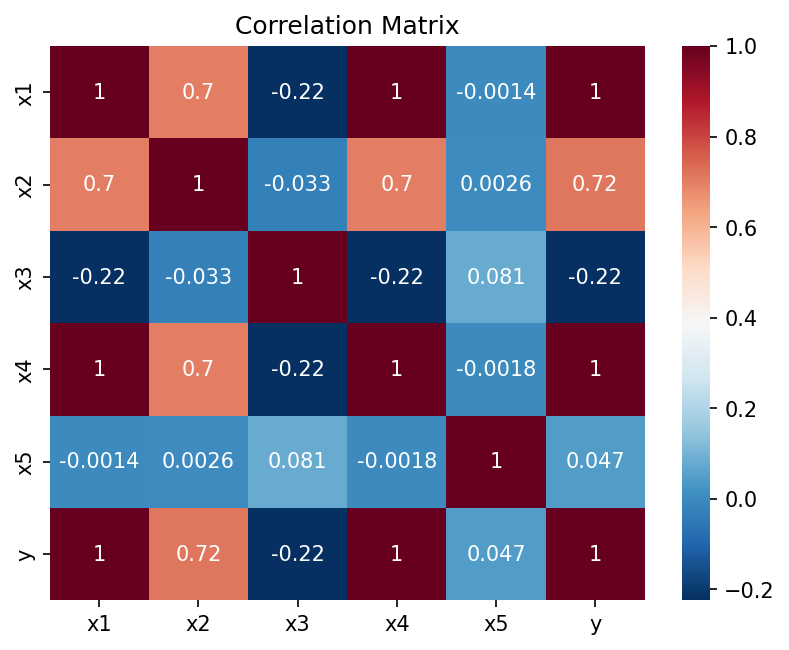

In [8]:
plt.figure(dpi=150)
sns.heatmap(df.corr(),annot=True,cmap="RdBu_r")
plt.title("Correlation Matrix")
plt.show()

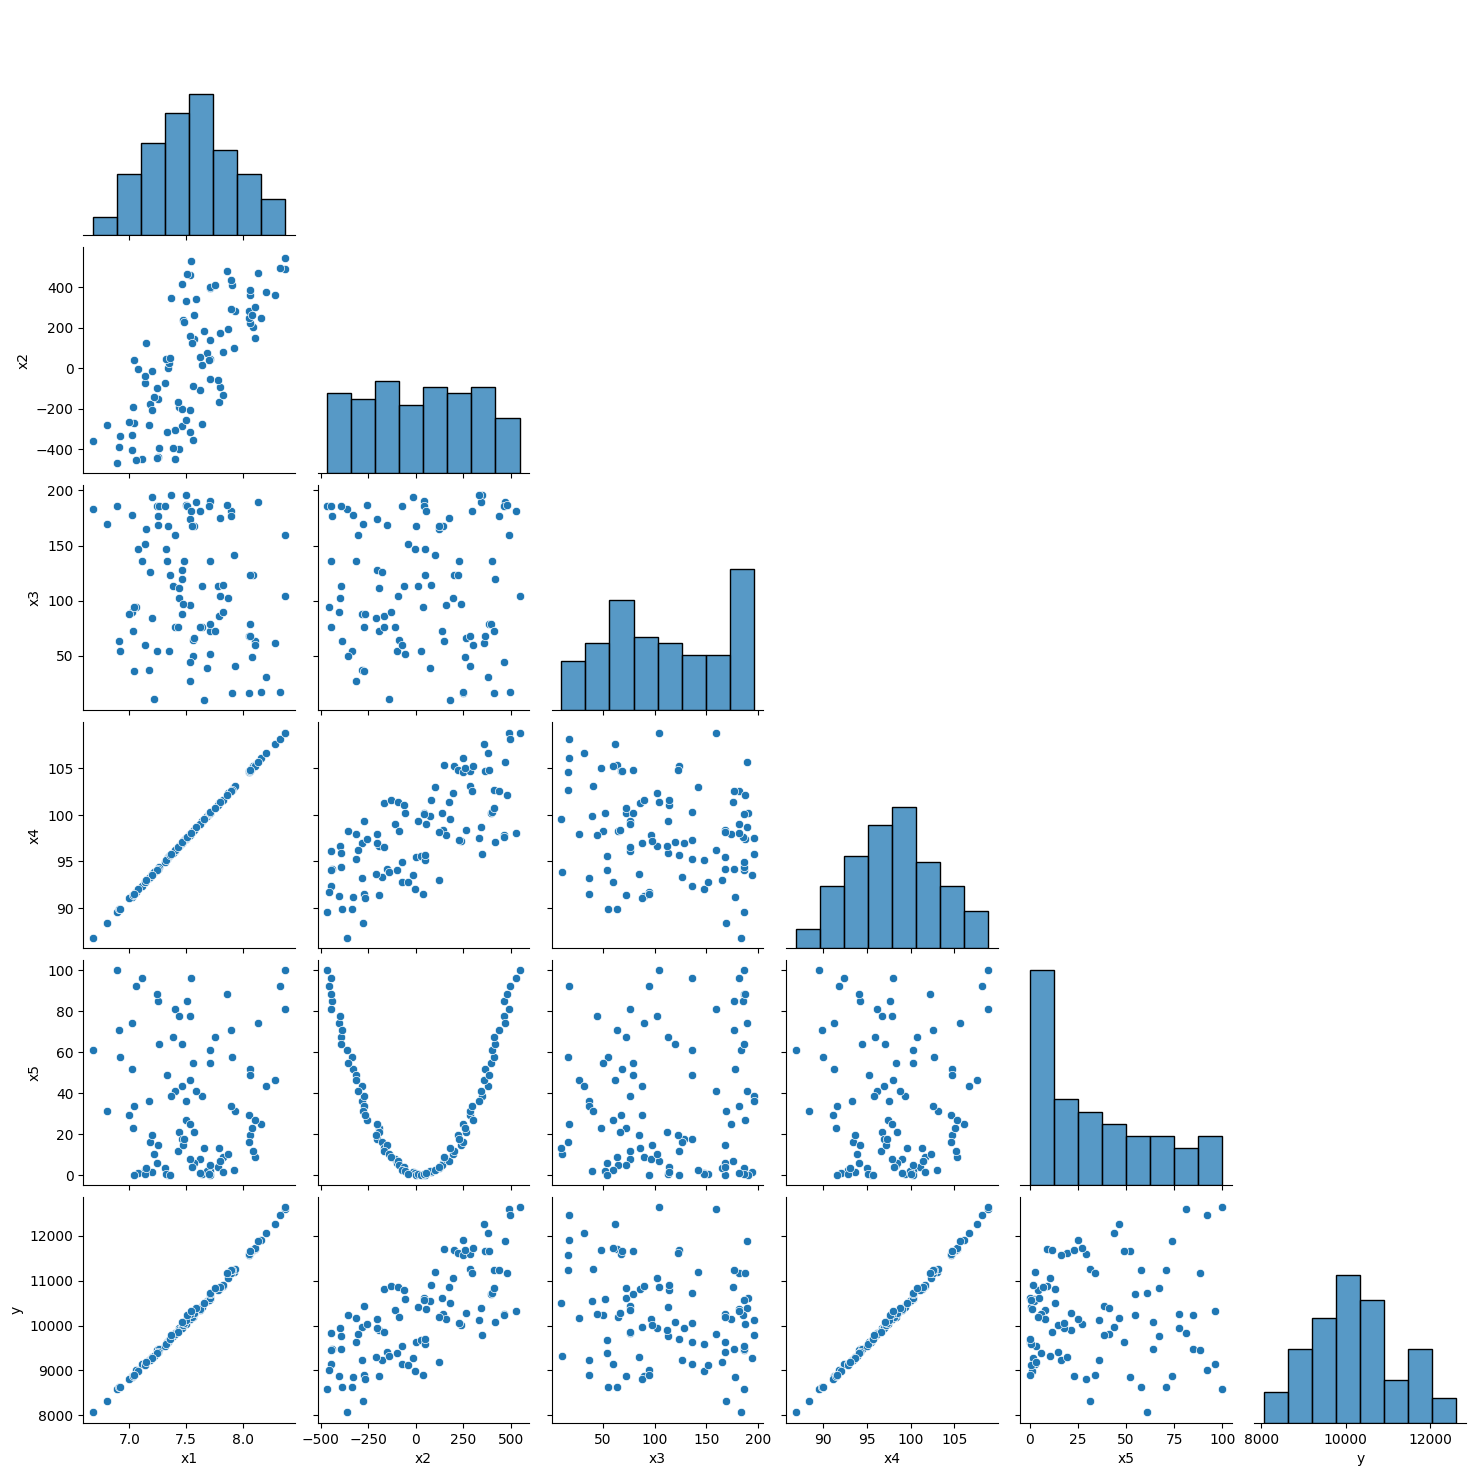

In [9]:
sns.pairplot(df,corner=True)
plt.show()

In [10]:
correlations = dict()
for column1 in X.columns:
  for column2 in X.columns:
    if column1[-1] <= column2[-1]:
      temp = X[column1]*X[column2]
      correlations[str(column1)+"*"+str(column2)] = np.corrcoef(temp,df["y"])[0][1]

In [11]:
for columns, correlation in correlations.items():
  if correlation > 0.5:
    columns = columns.split("*")
    df[columns[0]+"*"+columns[1]] = df[columns[0]]*df[columns[1]]

In [12]:
correlations = dict(sorted(correlations.items(), key=lambda item: item[1]))

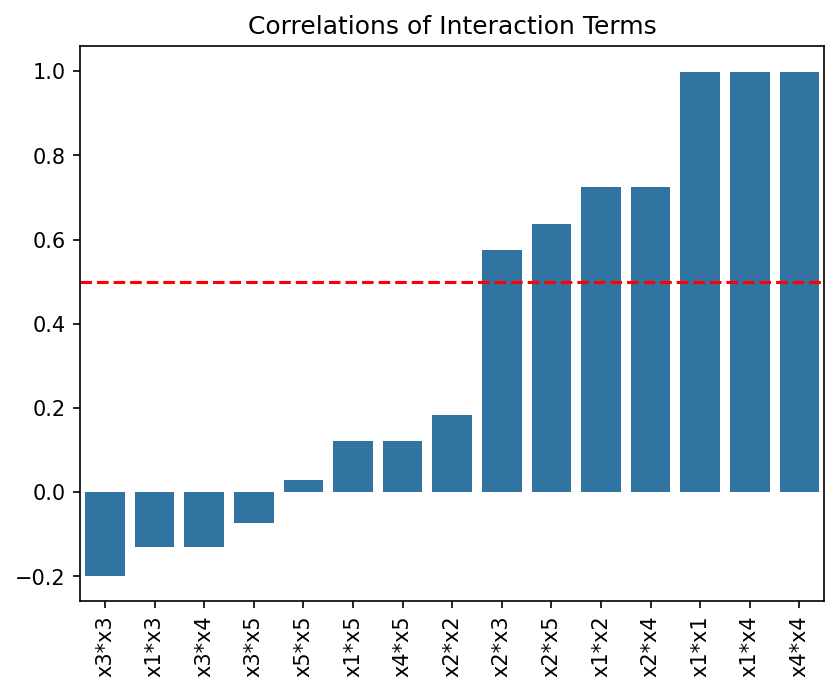

In [13]:
plt.figure(dpi=150)
sns.barplot(x=list(correlations.keys()),y=list(correlations.values()),order=list(correlations.keys()))
plt.xticks(rotation=90)
plt.title("Correlations of Interaction Terms")
plt.axhline(y=0.5,color="red",linestyle="--")
plt.show()

In [14]:
transformed_x5_values = []
for i in range(len(df)):
  if df.iloc[i]["x2"] < 0:
    transformed_x5_values.append(-df.iloc[i]["x5"]**0.5)
  else:
    transformed_x5_values.append(df.iloc[i]["x5"]**0.5)

In [15]:
df["x5_transformed"] = transformed_x5_values

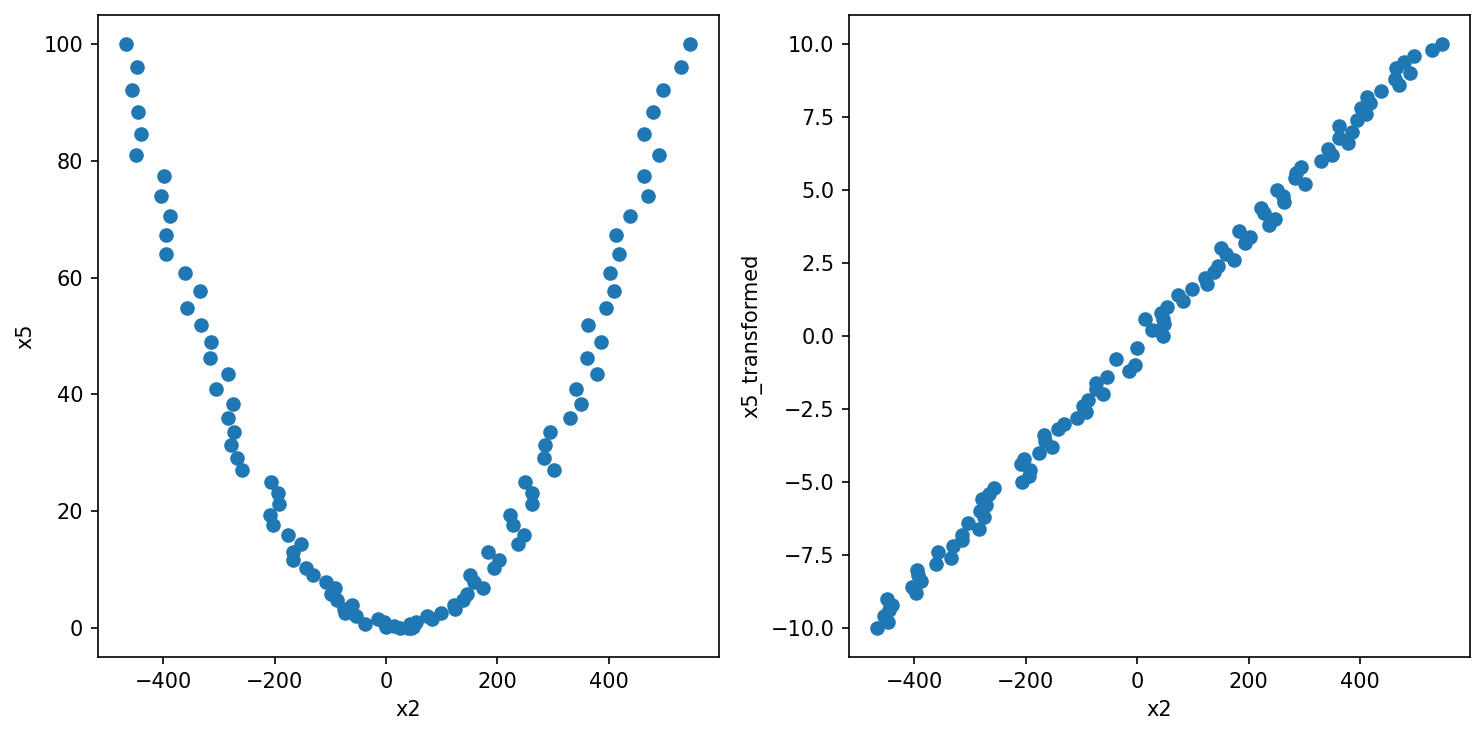

In [16]:
fig, ax = plt.subplots(1,2,dpi=150,figsize=(10,5))
ax[0].scatter(df["x2"],df["x5"])
ax[0].set_xlabel("x2")
ax[0].set_ylabel("x5")
ax[1].scatter(df["x2"],df["x5_transformed"])
ax[1].set_xlabel("x2")
ax[1].set_ylabel("x5_transformed")
plt.tight_layout()
plt.show()

In [17]:
print(f"Correlation of transformed x5 with y is {np.corrcoef(df['x5_transformed'],df['y'])[0][1]}")

Correlation of transformed x5 with y is 0.716640170641862


# Task 3

In [18]:
X = df.drop(["x1","x3","y"],axis=1)
y = df["y"]

In [19]:
new_model = LinearRegression()
new_model.fit(X,y)
y_pred = new_model.predict(X)
print(f"New SSE loss = {sse(y,y_pred)}")

New SSE loss = 36.273587007745704


# Task 4

In [20]:
!pip install lazypredict

In [21]:
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [22]:
X = df[["x1","x2","x3","x4","x5"]]
y = df["y"]

lazy_model_1 = LazyRegressor(verbose=0,ignore_warnings=True)
models_1, predictions = lazy_model_1.fit(X, X, y, y)
models_1 = pd.DataFrame(models_1)

100%|██████████| 42/42 [00:03<00:00, 12.99it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 160
[LightGBM] [Info] Number of data points in the train set: 101, number of used features: 5
[LightGBM] [Info] Start training from score 10244.460319
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [23]:
X = df.drop(["x1","x3","y"],axis=1)
y = df["y"]

lazy_model_2 = LazyRegressor(verbose=0,ignore_warnings=True)
models_2, predictions = lazy_model_2.fit(X, X, y, y)
models_2 = pd.DataFrame(models_2)

100%|██████████| 42/42 [00:04<00:00, 10.28it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 373
[LightGBM] [Info] Number of data points in the train set: 101, number of used features: 11
[LightGBM] [Info] Start training from score 10244.460319
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [24]:
print(models_1)

                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
DecisionTreeRegressor                        1.00       1.00     0.00   
ExtraTreeRegressor                           1.00       1.00     0.00   
ExtraTreesRegressor                          1.00       1.00     0.00   
GaussianProcessRegressor                     1.00       1.00     0.00   
XGBRegressor                                 1.00       1.00     0.01   
GradientBoostingRegressor                    1.00       1.00     4.27   
RANSACRegressor                              1.00       1.00    26.68   
LinearRegression                             1.00       1.00    26.68   
TransformedTargetRegressor                   1.00       1.00    26.68   
Lars                                         1.00       1.00    26.68   
OrthogonalMatchingPursuitCV                  1.00       1.00    26.80   
LassoLarsIC                                  1.00  

In [25]:
print(models_2)

                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
DecisionTreeRegressor                        1.00       1.00     0.00   
ExtraTreeRegressor                           1.00       1.00     0.00   
ExtraTreesRegressor                          1.00       1.00     0.00   
GaussianProcessRegressor                     1.00       1.00     0.00   
XGBRegressor                                 1.00       1.00     0.02   
RANSACRegressor                              1.00       1.00     0.60   
TransformedTargetRegressor                   1.00       1.00     0.60   
LinearRegression                             1.00       1.00     0.60   
BayesianRidge                                1.00       1.00     0.60   
LassoLarsIC                                  1.00       1.00     0.61   
LassoLarsCV                                  1.00       1.00     0.61   
OrthogonalMatchingPursuitCV                  1.00  